<a href="https://colab.research.google.com/github/geniuschinchillas/ChinchillasSnack/blob/master/Supervised%20Learning/k_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.datasets import samples_generator as sg

In [0]:
%matplotlib inline

In [0]:
import mglearn

**k-Nearest Neighbors**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

k-Neighbors classification

In [0]:
from sklearn.datasets.samples_generator import make_blobs

In [0]:
from sklearn.datasets.samples_generator import make_blobs

In [0]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=0)

In [10]:
print(X.shape)

(200, 2)


In [11]:
print(y)

[1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1
 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1
 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0
 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0]


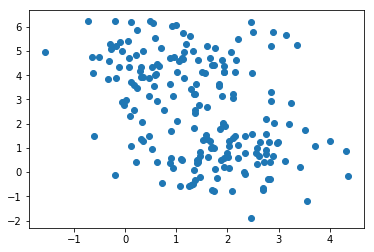

In [12]:
plt.scatter(X[:,0], X[:,1])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
print("Test set predictions: ", clf.predict(X_test))

Test set predictions:  [1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 1 1 0]


In [16]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.98


In [17]:
for n_neighbors in [1,3,5,7,9,11]:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.98
Test set accuracy: 0.96
Test set accuracy: 0.96
Test set accuracy: 0.94
Test set accuracy: 0.96
Test set accuracy: 0.94


AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)


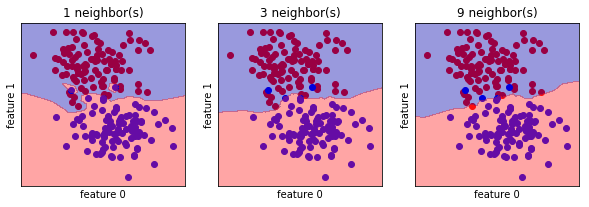

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    s0 = y == 0
    s1 = y == 1
    print(ax)
    ax.scatter(X[s0,0],X[s0,1], c='r')
    ax.scatter(X[s1,0],X[s1,1], c='b')
    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)

    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

In [0]:
from sklearn.datasets import load_wine
wine = load_wine()

In [20]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [21]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   stratify = wine.target, random_state=66)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print("Wine train set accuracy: {:.2f}".format(clf.score(X_train, y_train)))
print("Wine test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Wine train set accuracy: 0.86
Wine test set accuracy: 0.69


In [23]:
for n_neighbors in [1,3,5,7,9,11,13]:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    print(n_neighbors, "neighbors with wine train set accuracy: {:.2f}".format(clf.score(X_train, y_train)))
    print(n_neighbors, "neighbors with wine test set accuracy: {:.2f}".format(clf.score(X_test, y_test)), '\n')

1 neighbors with wine train set accuracy: 1.00
1 neighbors with wine test set accuracy: 0.76 

3 neighbors with wine train set accuracy: 0.86
3 neighbors with wine test set accuracy: 0.69 

5 neighbors with wine train set accuracy: 0.80
5 neighbors with wine test set accuracy: 0.73 

7 neighbors with wine train set accuracy: 0.74
7 neighbors with wine test set accuracy: 0.62 

9 neighbors with wine train set accuracy: 0.78
9 neighbors with wine test set accuracy: 0.60 

11 neighbors with wine train set accuracy: 0.74
11 neighbors with wine test set accuracy: 0.58 

13 neighbors with wine train set accuracy: 0.77
13 neighbors with wine test set accuracy: 0.62 



In [0]:
training_accuracy = []
test_accuracy = []

In [0]:
neighbors_settings = range(1, 11)

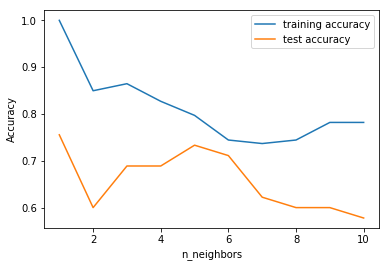

In [26]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

k-neighbors regression

In [0]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print(X.shape)
print(y.shape)

(40, 1)
(40,)


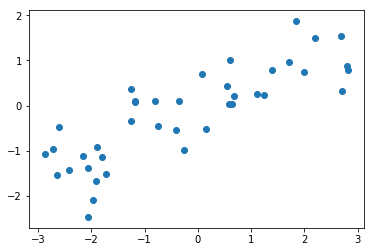

In [29]:
plt.scatter(X[:,0], y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

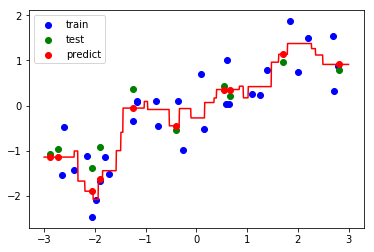

In [31]:
plt.scatter(X_train[:,0], y_train, c='b' , label="train")
plt.scatter(X_test[:,0], y_test, c='g', label="test")
plt.scatter(X_test[:,0], reg.predict(X_test), c='r' , label="predict")
line = np.linspace(-3, 3, 1000).reshape(-1,1)
plt.plot(line, reg.predict(line), c='r')
plt.legend()

In [32]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


In [0]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   stratify = wine.target, random_state=66)


In [34]:
for n_neighbors in [1,3,5,7,9,11,13]:
    clf = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    print(n_neighbors, "neighbors with wine train set accuracy: {:.2f}".format(clf.score(X_train, y_train)))
    print(n_neighbors, "neighbors with wine test set accuracy: {:.2f}".format(clf.score(X_test, y_test)), '\n')

1 neighbors with wine train set accuracy: 1.00
1 neighbors with wine test set accuracy: 0.37 

3 neighbors with wine train set accuracy: 0.75
3 neighbors with wine test set accuracy: 0.50 

5 neighbors with wine train set accuracy: 0.69
5 neighbors with wine test set accuracy: 0.45 

7 neighbors with wine train set accuracy: 0.65
7 neighbors with wine test set accuracy: 0.46 

9 neighbors with wine train set accuracy: 0.66
9 neighbors with wine test set accuracy: 0.46 

11 neighbors with wine train set accuracy: 0.63
11 neighbors with wine test set accuracy: 0.46 

13 neighbors with wine train set accuracy: 0.62
13 neighbors with wine test set accuracy: 0.48 



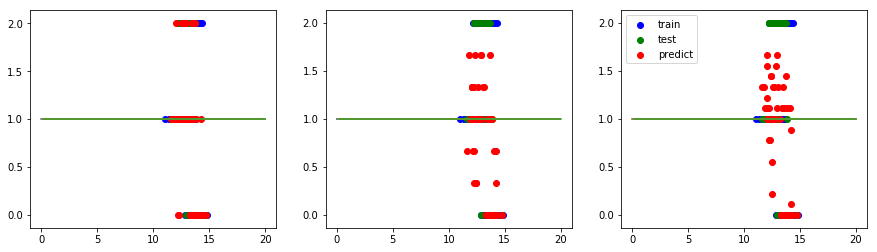

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

line = np.linspace(0, 20, 1300).reshape(-1, 13)
#print(X_train.shape)
#print(reg.predict(line).shape)


for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    
    ax.scatter(X_train[:,0], y_train, c='b' , label="train")
    ax.scatter(X_test[:,0], y_test, c='g', label="test")
    ax.scatter(X_test[:,0], reg.predict(X_test), c='r' , label="predict")
    
plt.legend()